# 随机微分方程模拟

### 一道简单的差分方程例题

有一个医生给病人开药，要求病人血液中的钙离子浓度稳定在一个有效的值，求如何开药？
前提：
A在病人体内原本就有。
不服药的情况下，每一周的A浓度水平是前一周的一半。
列式：
an+1 = 0.5 × an + b

In [1]:
import matplotlib.pyplot as plt
def drawCurve(Reagentperday,CurrentLevel):
    RegentLevel = []
    for i in range(15):
        RegentLevel.append(CurrentLevel)
        CurrentLevel = CurrentLevel * 0.5 + Reagentperday
    Time = [i for i in range(15)]
    #print(Time,RegentLevel)
    plt.plot(Time, RegentLevel)

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


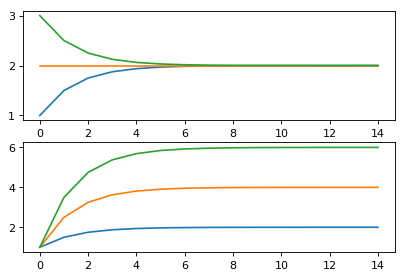

In [2]:
fig = plt.figure(num=1,dpi=80)
for i in range(1,4):
    plt.subplot(2,1,1) 
    drawCurve(1,i)  # 改变初始点
    plt.subplot(2,1,2)   
    drawCurve(i,1)  # 改变b

### 一般的微分方程模拟
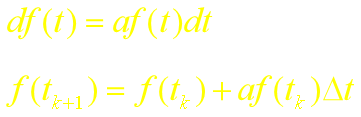

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# X1,Y1为横纵坐标
X1 = np.linspace(0,10,1000)
def Y1(a,y=2) :
        X1 = np.linspace(0,10,1000)
        dt = 10/1000
        Y = []
        for i in X1 :
            Y.append(y)
            y = y + a*y*dt
        return Y

In [5]:
def pict1(base_number=1.5,a=1,n=100,c=2,m=4) :
    # 配置画布
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=180)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('ODE')
    # 绘制图像
    for i in range(0,m) :
        a = pow(base_number,i)
        c = i
        for j in range(n) :
            plt.subplot(4,2,i+1) # 添加子图
            plt.title('(%d)'%(i+1)) # 设置标题
            plt.xlabel('x') # 坐标轴名
            plt.ylabel('y')
            l, = plt.plot(X1,Y1(a,j),cl[c]) # 改变初始点
        plt.legend(handles=[l,],labels=['a=%.1f'%a]) # 设置图例
    plt.tight_layout() #调整空白间隔
#     plt.savefig(r'D:\JWE\图片\可视化\模拟1：dft=ft+aftdt.png')
    plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


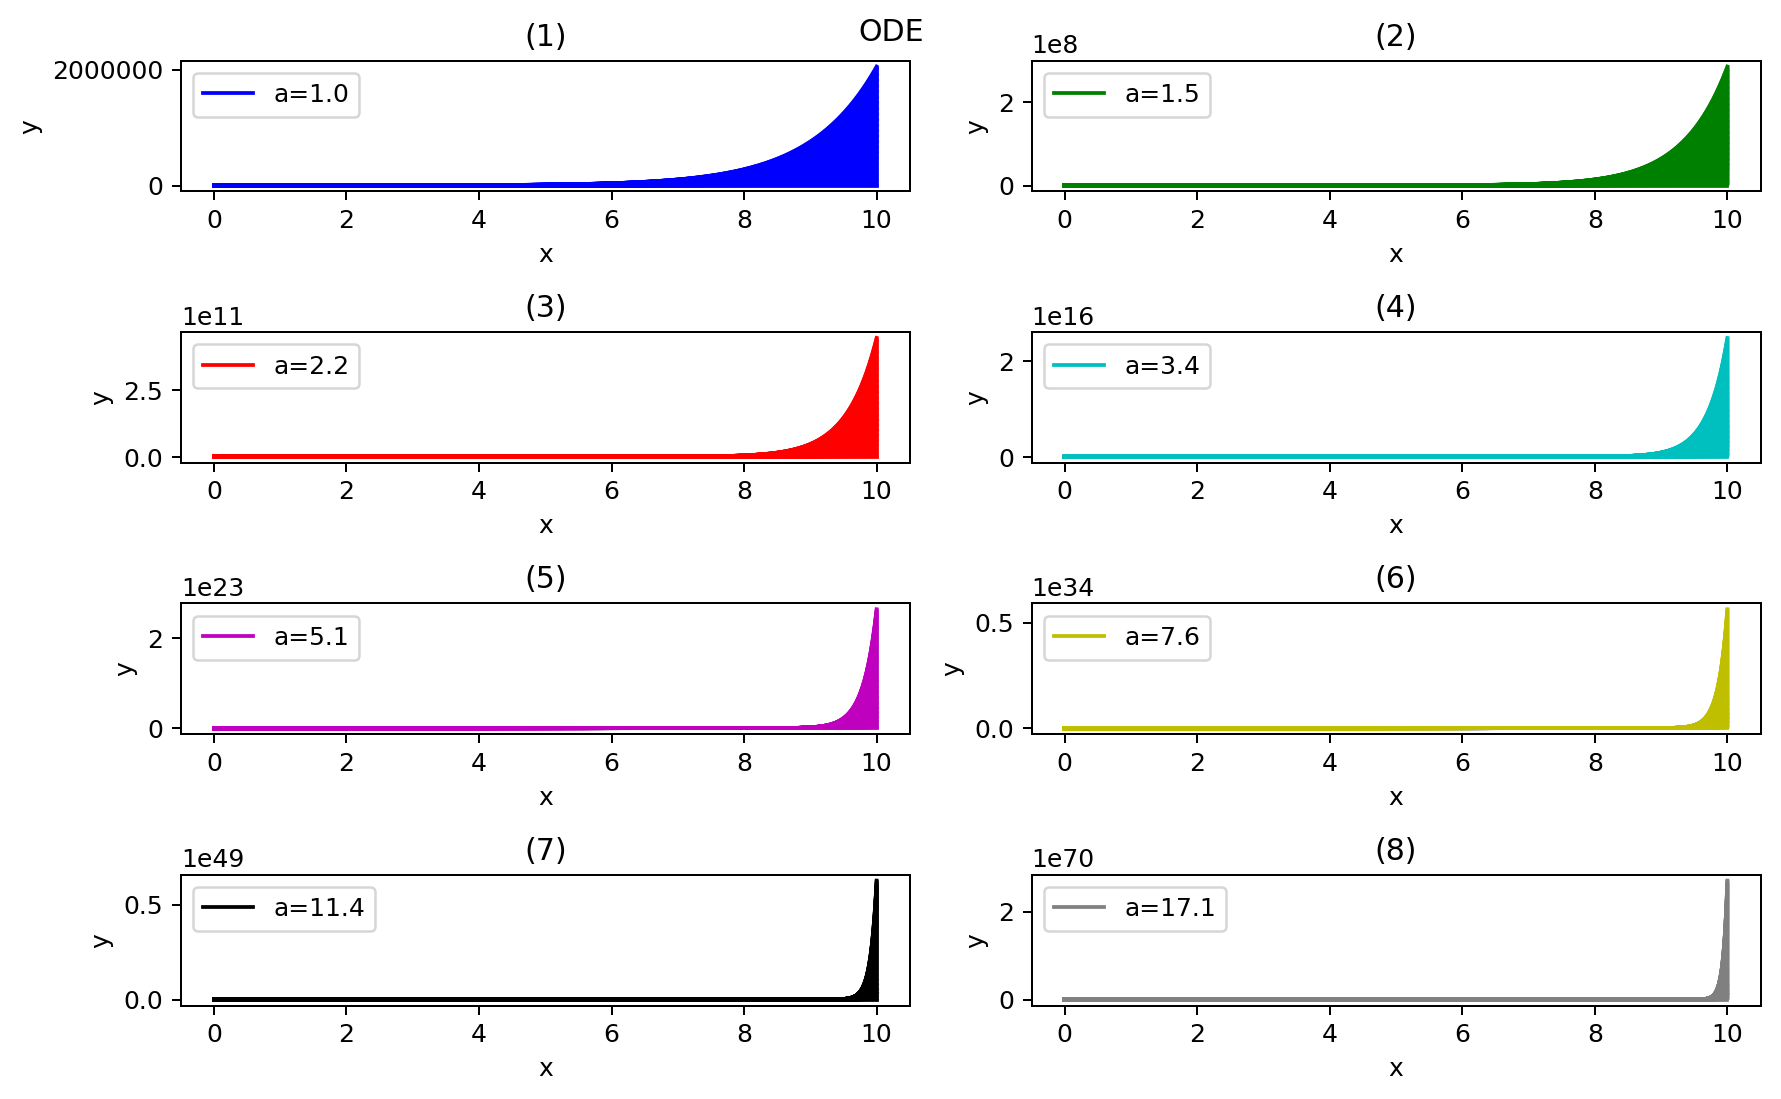

In [6]:
pict1(m=8)

### 随机微分方程模拟
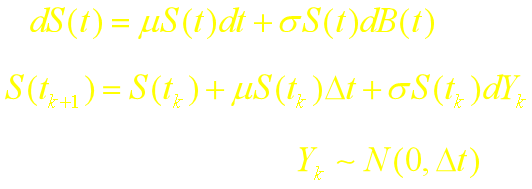

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# 主要是函数的变化
np.random.seed()
num = 1000
long = 10
X2 = np.linspace(0,long,num)
def Y2(mu,sigma,y=2) :
        X2 = np.linspace(0,long,num)
        dt = long/num
        norm = np.random.normal(0,dt,(1,num))
        Y = []
        for i in range(num) :
            dnorm = norm[0][i] 
#             dnorm = np.random.normal(0,dt)
            Y.append(y)
            y = y + mu*y*dt +sigma*y*dnorm
        return Y

In [9]:
# 基本上只用对一般方法进行调参
def pict2(mu=1,sigma=1,n=5,c=2,m=4,max_sigma=12.36,max_mu=1) :
    # 配置画布
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=300)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('SDE')
    # 绘制图像
    # mu,sigma变化
    for i in range(0,m) :
        mu = max_mu*np.random.random()
        sigma = max_sigma*np.random.random()
        c = i
        # dYt变化
        for j in range(n) :
            plt.subplot(4,2,i+1) # 添加子图
            plt.title('(%d)'%(i+1)) # 设置标题
            plt.xlabel('x') # 坐标轴名
            plt.ylabel('y')
            l, = plt.plot(X2,Y2(mu,sigma),cl[c],linewidth=1) #画图
        plt.legend(handles=[l,],labels=['mu=%.2f sigma=%.2f'%(mu,sigma)]) # 设置图例
    plt.tight_layout() #调整空白间隔
#     plt.savefig(r'D:\JWE\图片\可视化\模拟2：dSt=muStdt+sigmaStdB.png')
    plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


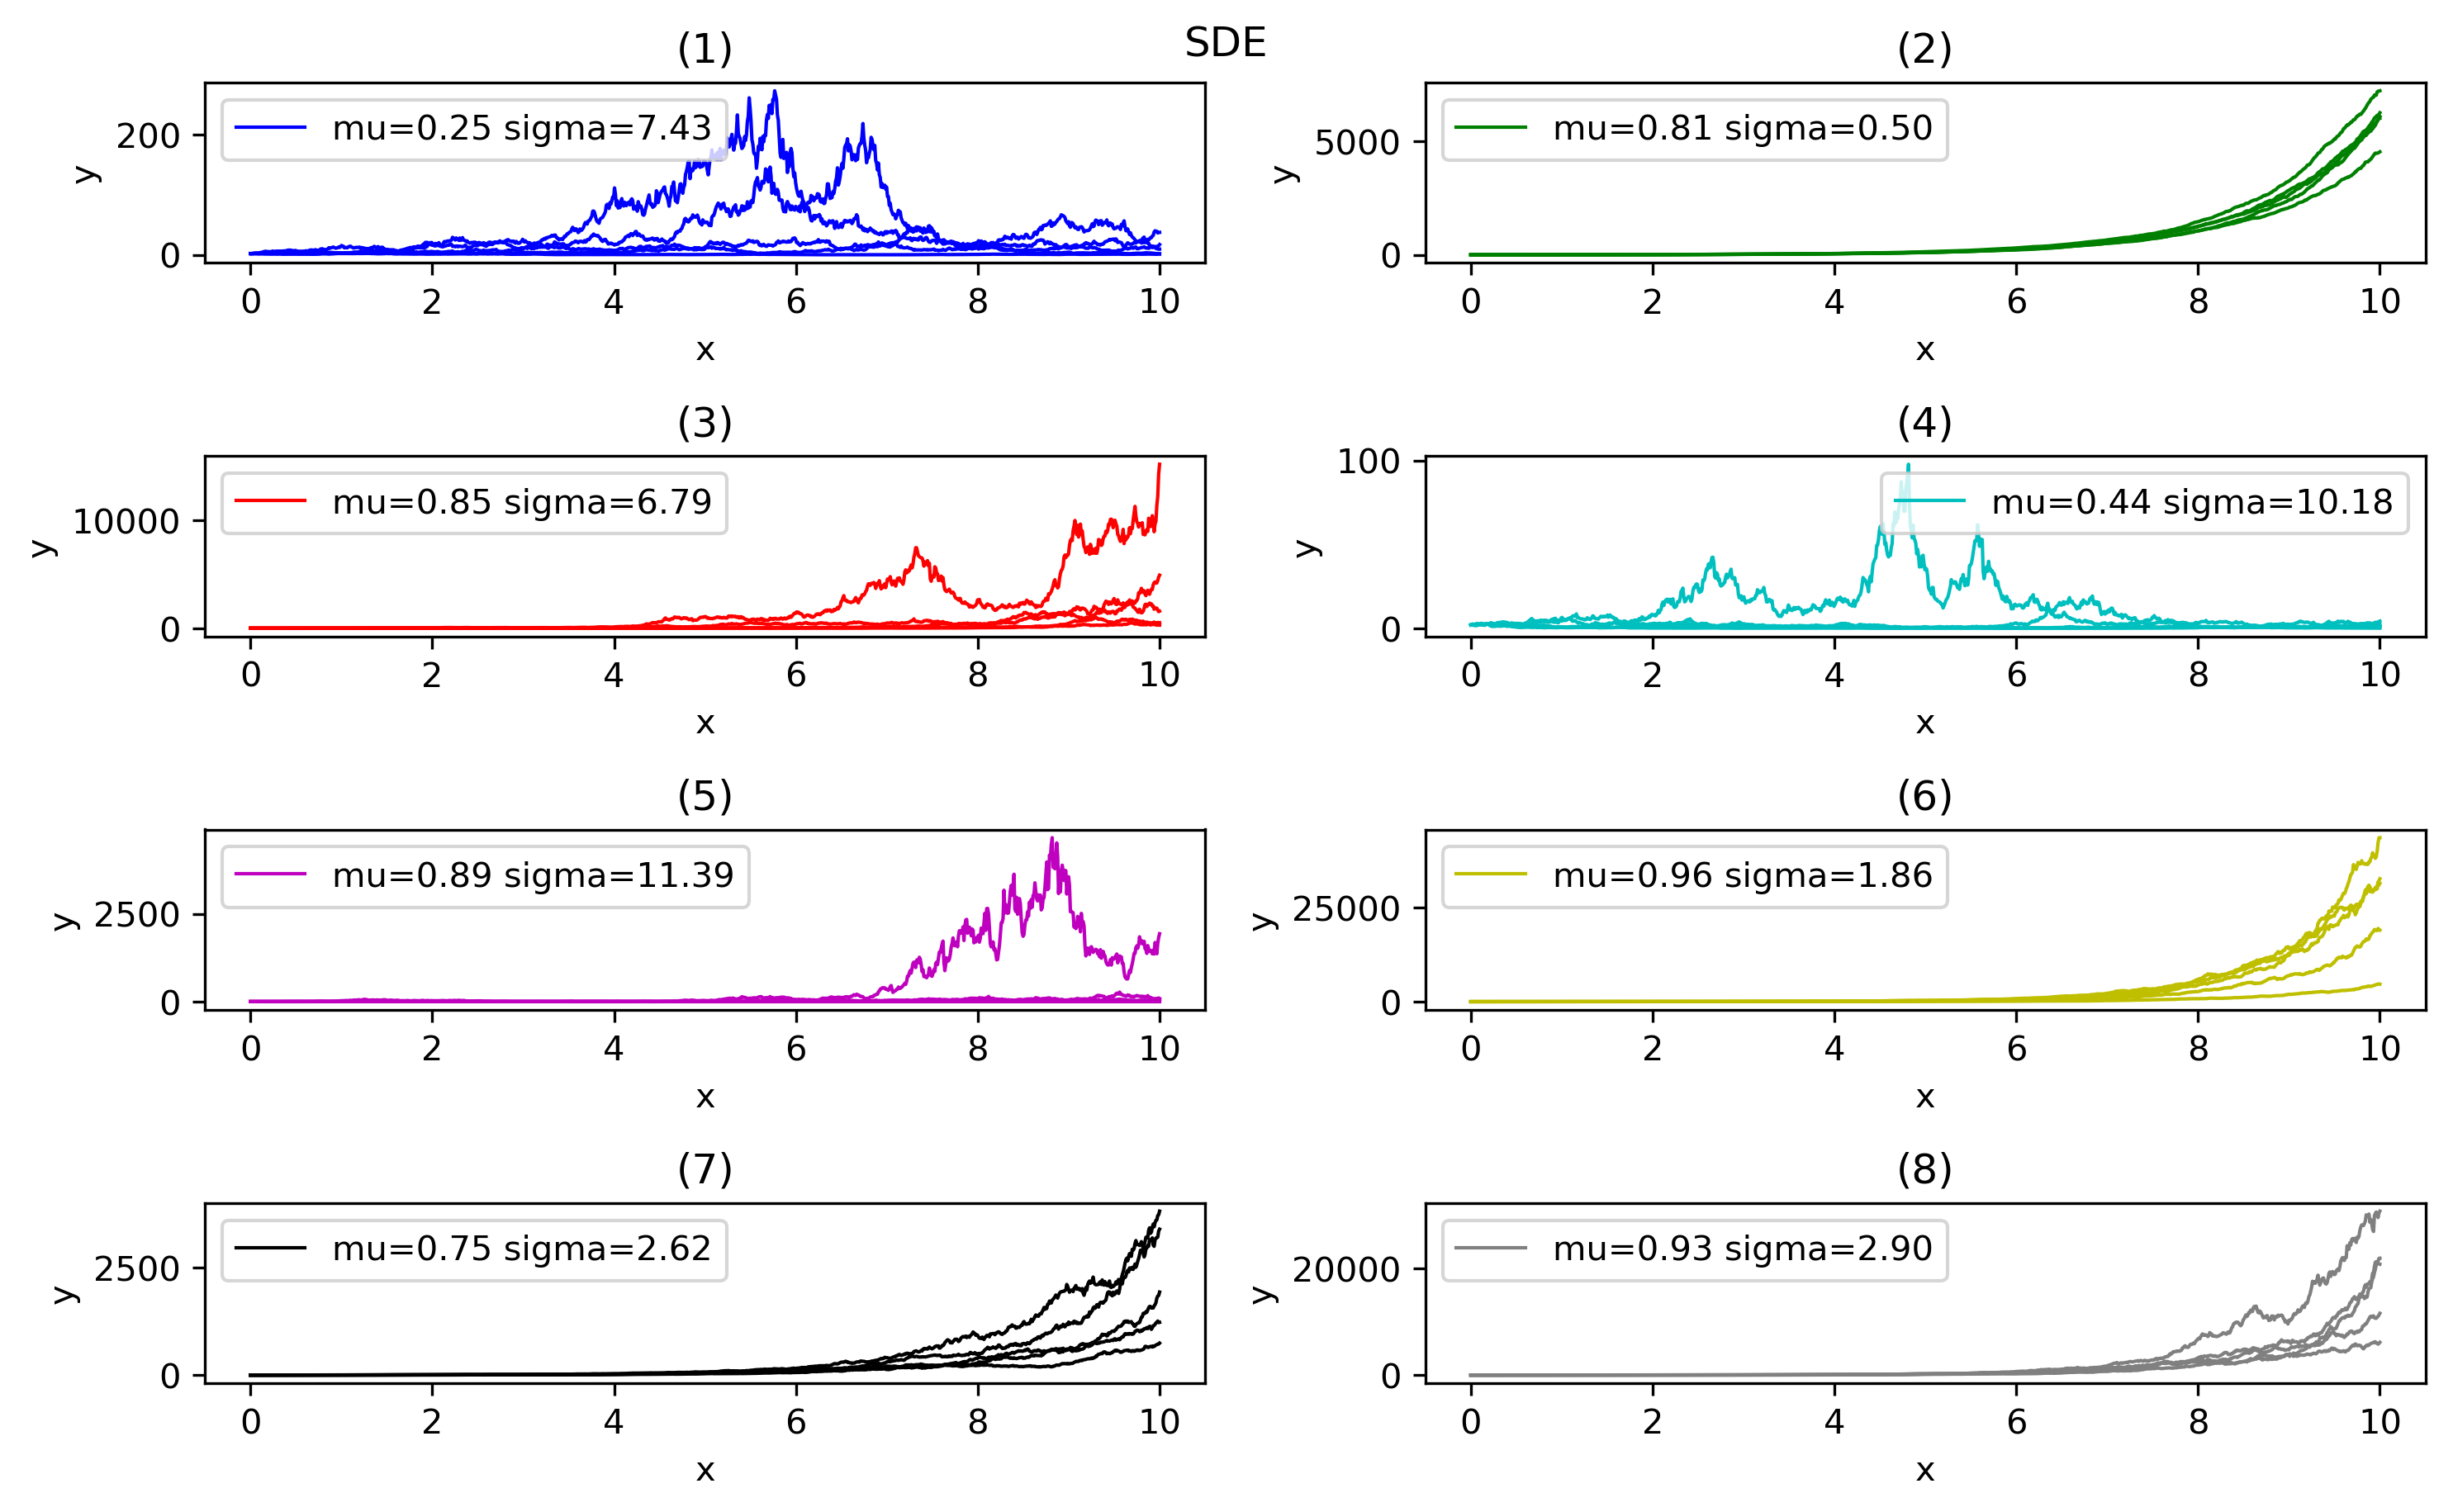

In [10]:
pict2(m=8)

### 固定mu = 1，sigma变化

In [11]:
num = 1000
long = 10
X3 = np.linspace(0,long,num)
def Y3(mu,sigma,y=2,i=1) :
        X3 = np.linspace(0,long,num)
        dt = long/num
#         norm = np.random.normal(0,dt,(1,num))
        Y = []
        for i in range(num) :
#             dnorm = norm[0][i]
            dnorm = np.random.normal(0,dt)
            Y.append(y)
            y = y + mu*y*dt +sigma*y*dnorm
        return Y

In [12]:
def pict3(mu=1,sigma=1,n=5,c=2,m=4,max_sigma=18.54) :
    
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=300)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('SDE')
    
    for i in range(0,m) :
        sigma = max_sigma*np.random.ranf()
        c = i
        for j in range(n) :
            plt.subplot(4,2,i+1) 
            plt.title('(%d)'%(i+1)) 
            plt.xlabel('x') 
            plt.ylabel('y')
            l, = plt.plot(X3,Y3(mu,sigma,j),cl[c],linewidth=1) 
        plt.legend(handles=[l,],labels=['mu=%.2f sigma=%.2f'%(mu,sigma)]) 
    plt.tight_layout() 
#     plt.savefig(r'D:\JWE\图片\可视化\模拟3：sigma变化.png')
    plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


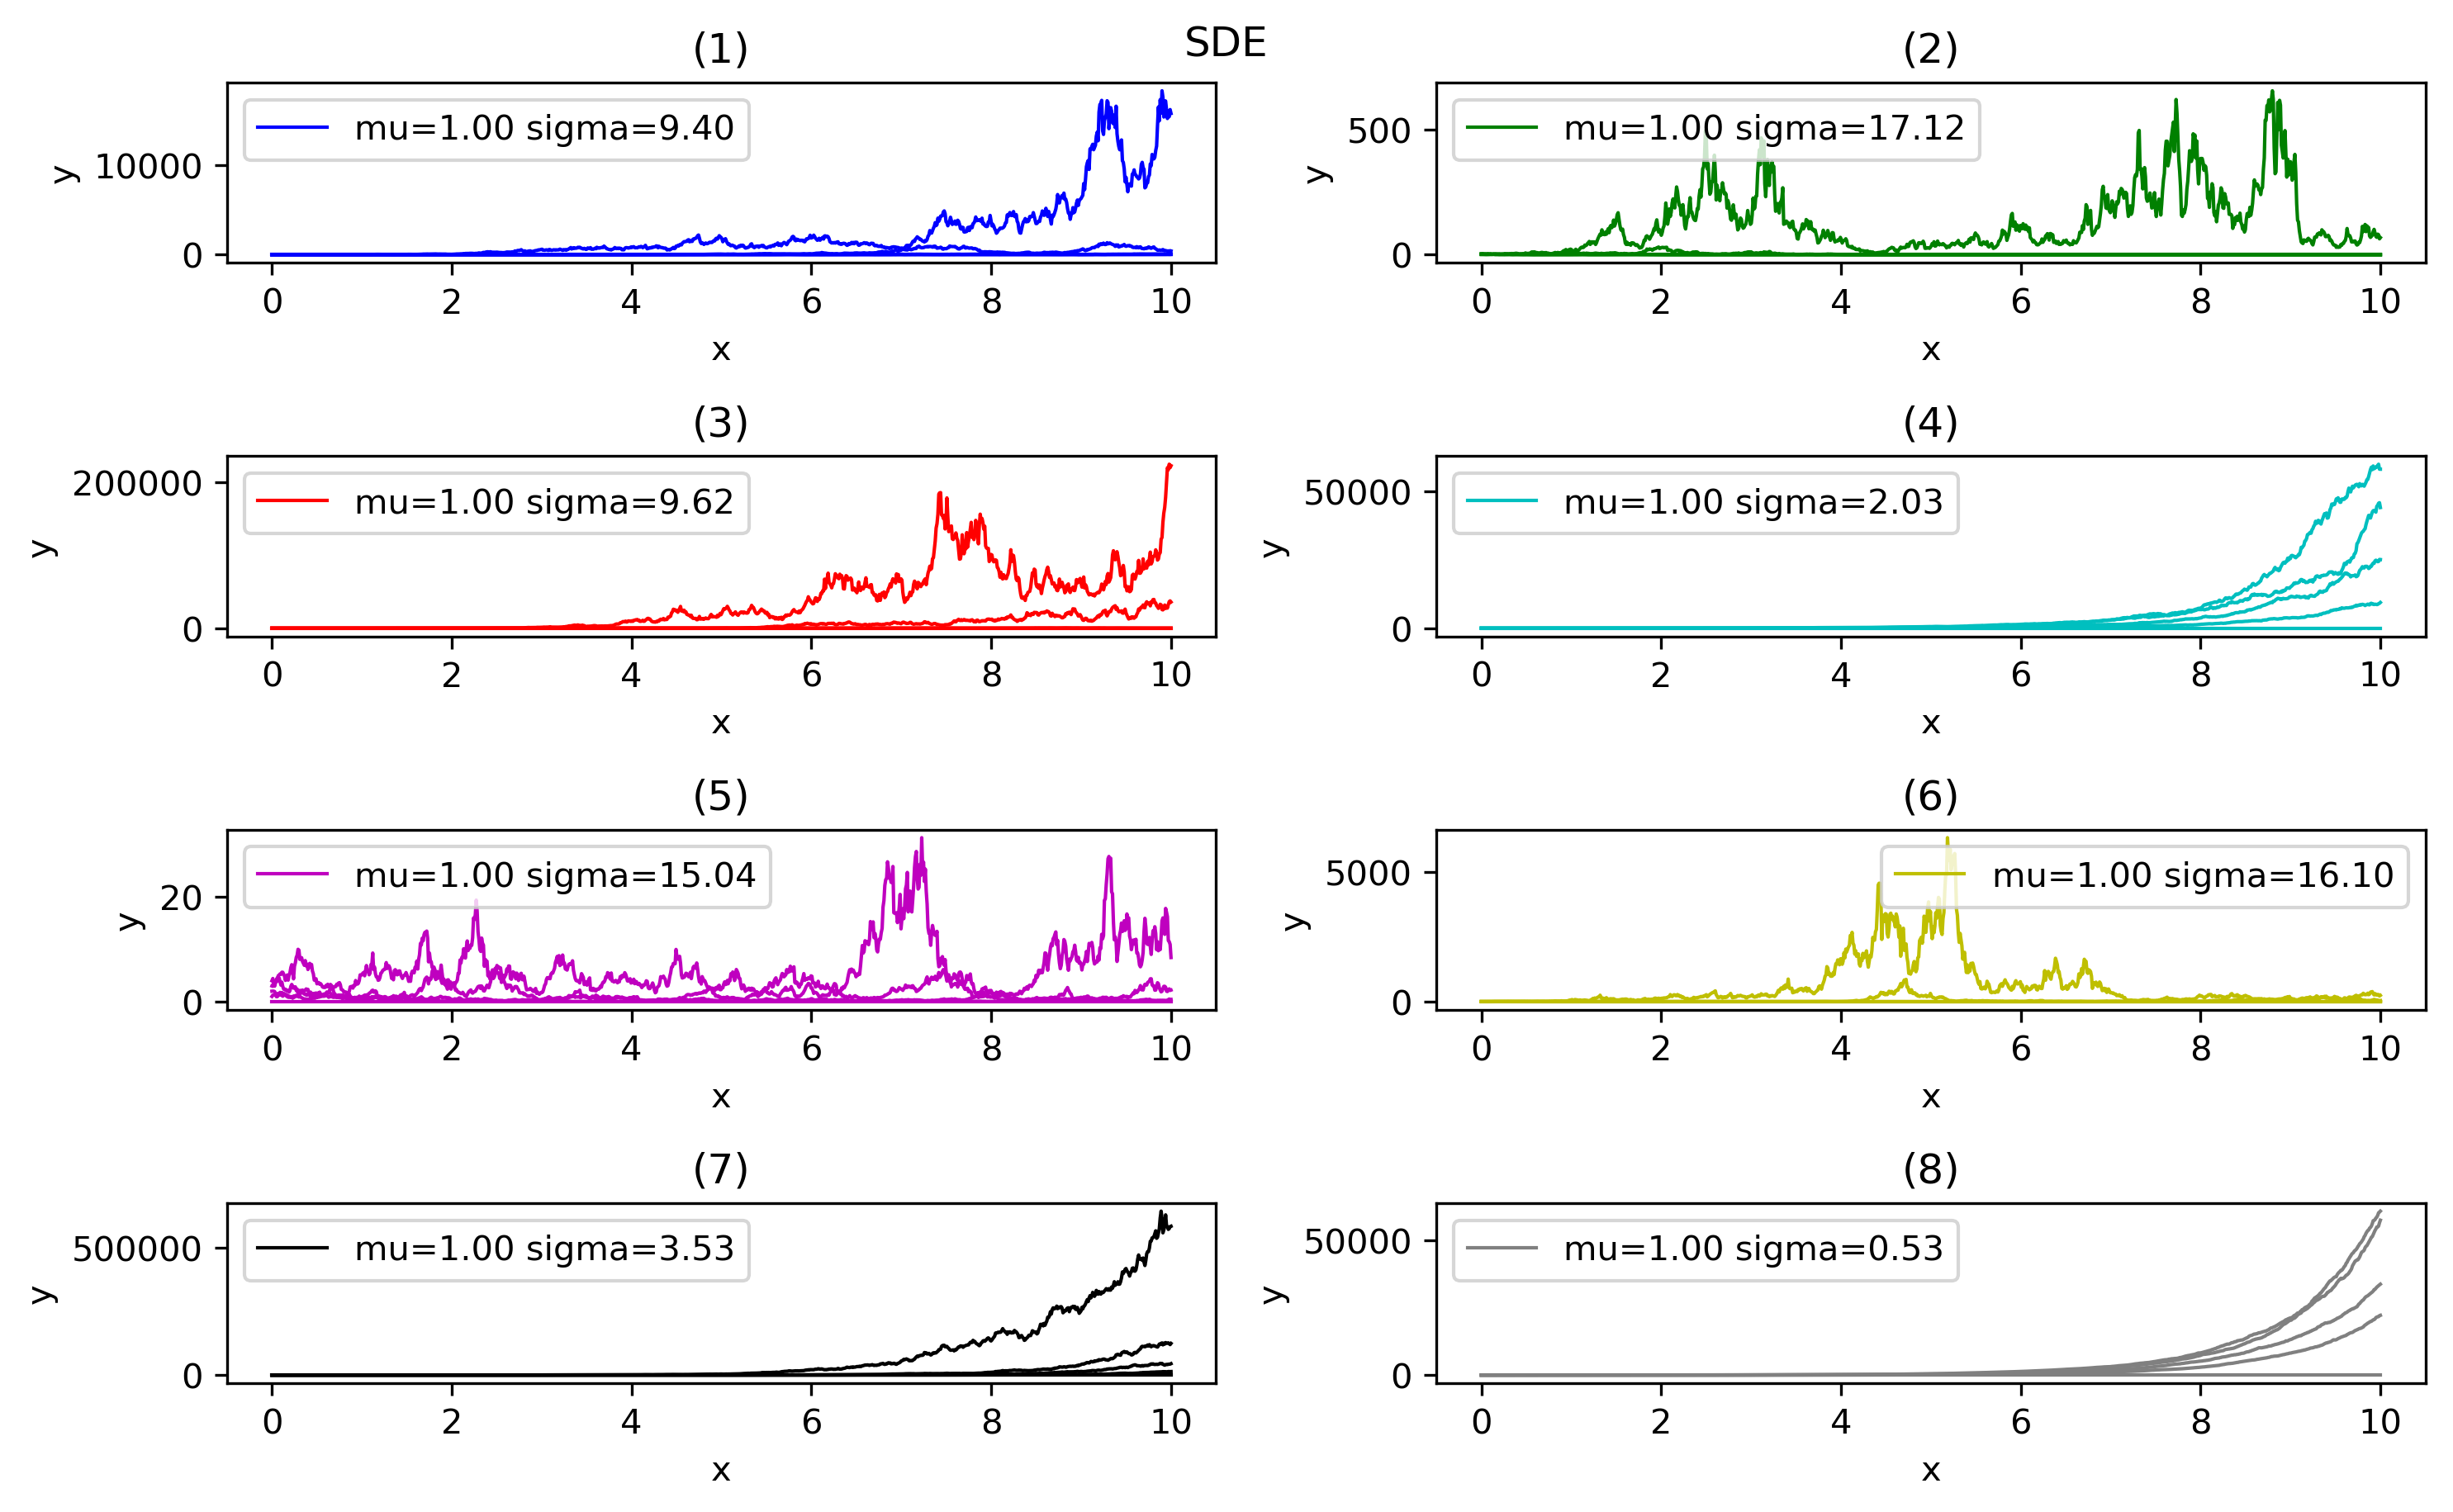

In [13]:
pict3(m=8)

### 固定sigma = 1，mu变化

In [14]:
num = 1000
long = 10
X4 = np.linspace(0,long,num)
def Y4(mu,sigma,y=2) :
        X4 = np.linspace(0,long,num)
        dt = long/num
#         norm = np.random.normal(0,dt,(1,num))
        Y = []
        for i in range(num) :
#             dnorm = norm[0][i]
            dnorm = np.random.normal(0,dt)
            Y.append(y)
            y = y + mu*y*dt +sigma*y*dnorm
        return Y

In [15]:
def pict4(mu=1,sigma=1,n=5,c=2,m=4,max_mu=1) :
    
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=300)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('SDE')
    
    for i in range(0,m) :
        mu = max_mu*np.random.ranf()
        c = i
        for j in range(n) :
            plt.subplot(4,2,i+1) 
            plt.title('(%d)'%(i+1))
            plt.xlabel('x') 
            plt.ylabel('y')
            l, = plt.plot(X4,Y4(mu,sigma),cl[c],linewidth=1) 
        plt.legend(handles=[l,],labels=['mu=%.2f sigma=%.2f'%(mu,sigma)]) 
    plt.tight_layout() 
#     plt.savefig(r'D:\JWE\图片\可视化\模拟4：mu变化.png')
    plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


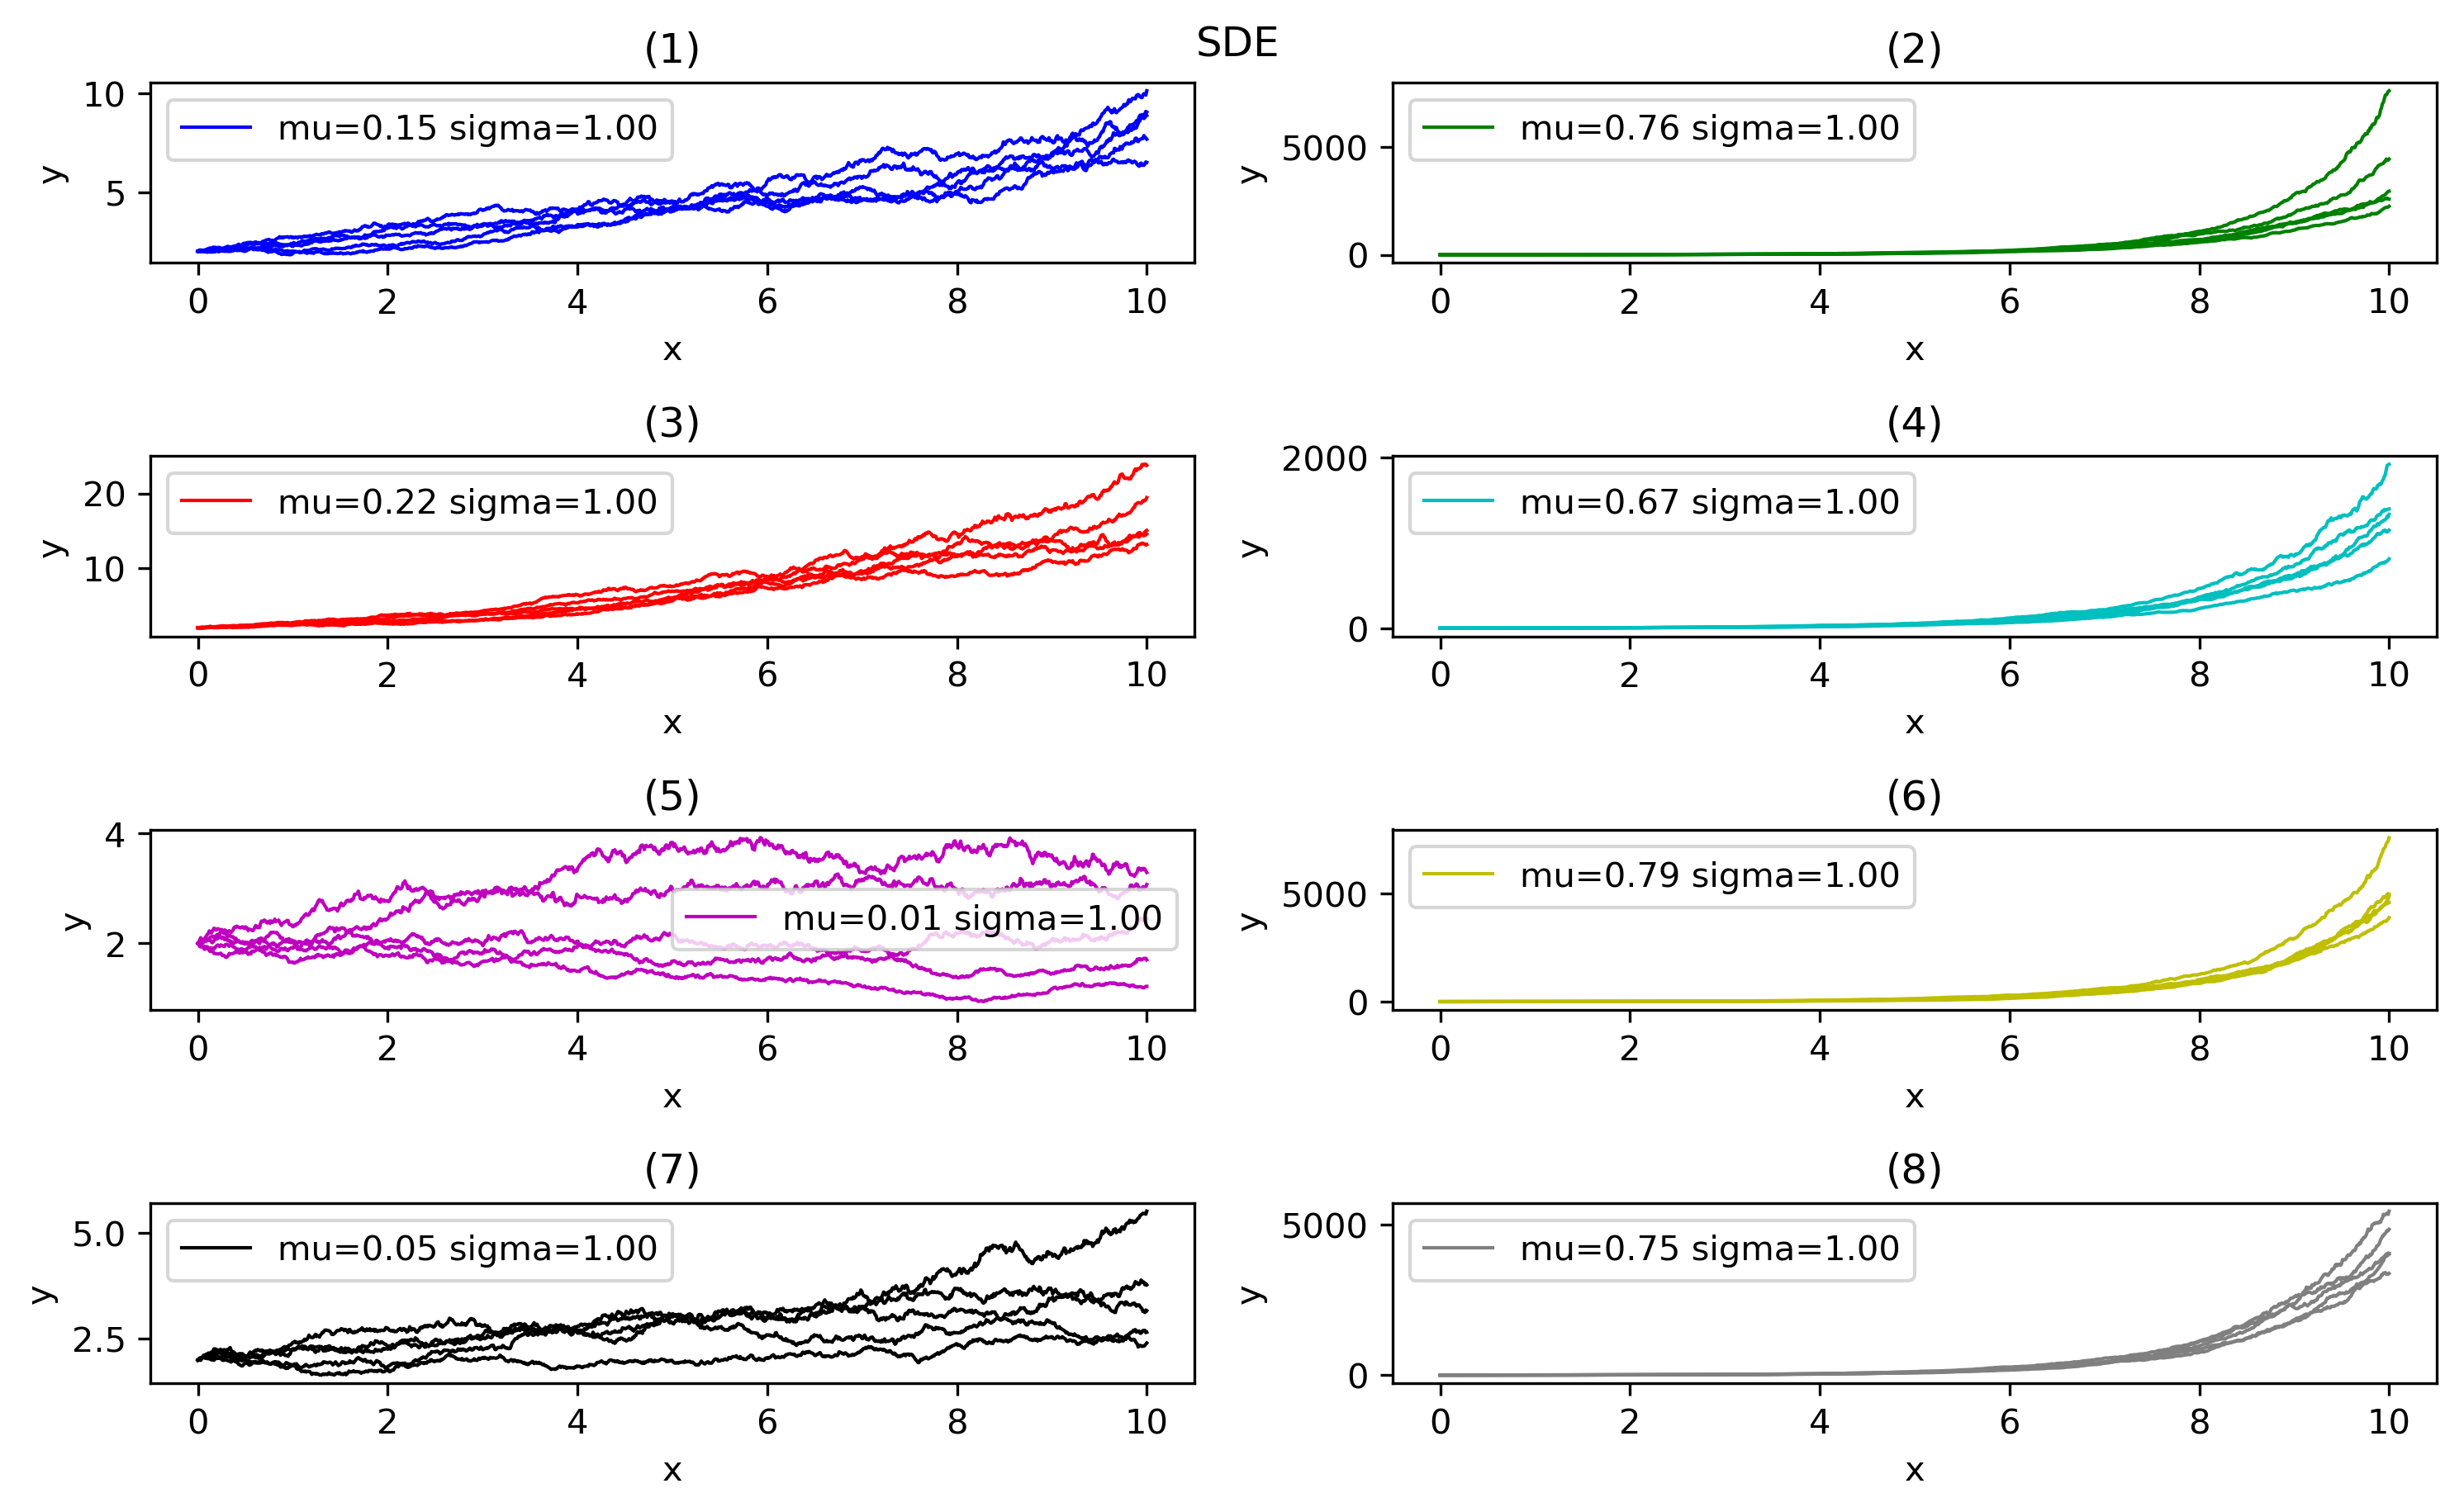

In [16]:
pict4(m=8)

### 试验

In [20]:
num = 1000
long = 10
X5 = np.linspace(0,long,num)
def Y5(mu,sigma,y=2) :
        X5 = np.linspace(0,long,num)
        dt = long/num
#         norm = np.random.normal(0,dt,(1,num))
        Y = []
        for i in range(num) :
#             dnorm = norm[0][i]
            dnorm = np.random.normal(0,dt)
            Y.append(y)
            y = y + mu*y*dt +sigma*y*dnorm
        return Y
X2 = np.linspace(0,long,num)
def Y2(mu,sigma,y=2) :
        X2 = np.linspace(0,long,num)
        dt = long/num
        norm = np.random.normal(0,dt,(1,num))
        Y = []
        for i in range(num) :
            dnorm = norm[0][i] 
#             dnorm = np.random.normal(0,dt)
            Y.append(y)
            y = y + mu*y*dt +sigma*y*dnorm
        return Y

In [21]:
def pict5(mu=1,sigma=(0.618,1,5,50),c=2):
    fig = plt.figure(num=1, figsize=(5, 3.09),dpi=180)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('SDE')
    plt.xlabel('x') 
    plt.ylabel('y')
    l1, = plt.plot(X5,Y5(mu,sigma[0]),cl[0],label='mu=1,sigma=%.3f'%sigma[0]) 
    l2, = plt.plot(X5,Y5(mu,sigma[1]),cl[1],label='mu=1,sigma=%.3f'%sigma[1])
    l3, = plt.plot(X5,Y5(mu,sigma[2]),cl[2],label='mu=1,sigma=%.3f'%sigma[2])
    l4, = plt.plot(X5,Y5(mu,sigma[3]),cl[3],label='mu=1,sigma=%.3f'%sigma[3])
    plt.legend()
#     plt.savefig(r'D:\JWE\图片\可视化\模拟5：四条曲线.png')
    plt.show()

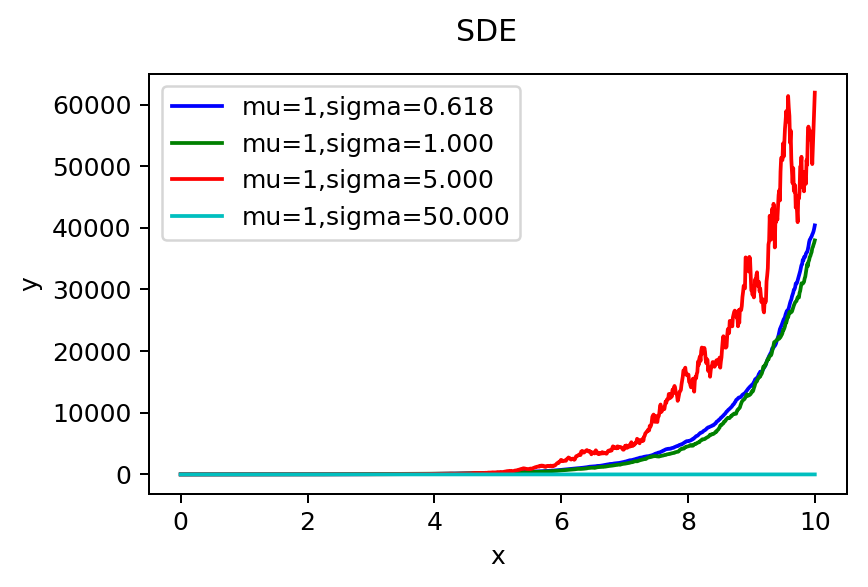

In [23]:
pict5()

In [35]:
def pict6(mu=1,sigma=0.618,c=2):
    fig = plt.figure(num=1, figsize=(5, 3.09),dpi=180)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('SDE')
    plt.xlabel('x') 
    plt.ylabel('y')
    l1, = plt.plot(X5,Y5(mu,sigma),cl[0],label='mu=1,sigma=%.3f,discrete normal'%sigma) 
    l2, = plt.plot(X2,Y2(mu,sigma),cl[1],label='mu=1,sigma=%.3f,continuous normal'%sigma)
    plt.legend()
    plt.savefig(r'D:\JWE\图片\可视化\模拟6：两条曲线.png')
    plt.show()   

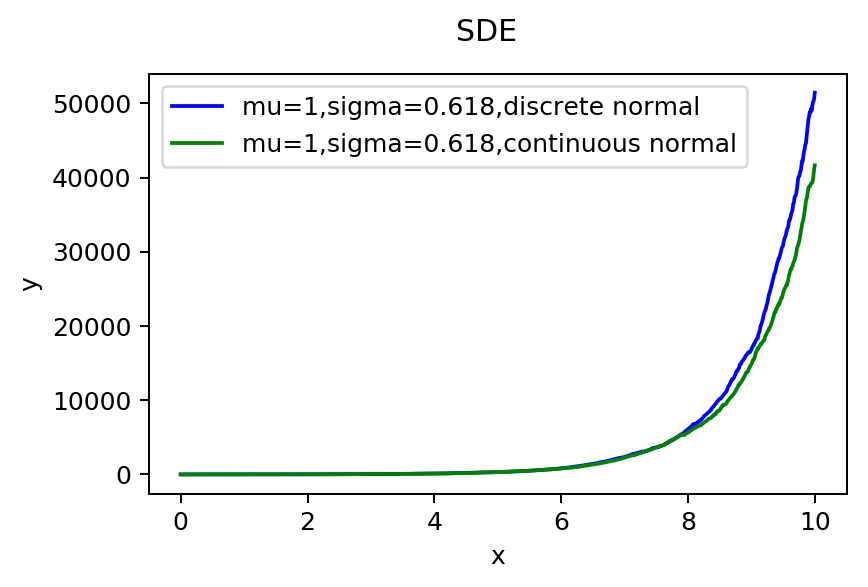

In [36]:
pict6()